# Temperature - Stations

In [1]:
import autoroot
from dotenv import load_dotenv

import xarray as xr
from dynev4eo._src.preprocess.masks import add_country_mask

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import seaborn as sns
sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)


%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle"
)



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from dynev4eo._src.io import MyPaths, MySavePaths

my_paths = MyPaths.init_from_dot_env()


In [3]:
!ls $my_paths.data_clean_dir


stations_spain.nc    t2m_stations_feten_spain.zarr
stations_spain.zarr  t2m_stations_spain.zarr


In [4]:

ds = xr.open_dataset(my_paths.data_clean_dir.joinpath("t2m_stations_feten_spain.zarr"), engine="zarr")
ds = add_country_mask(ds, "Spain") 
ds = ds.where(ds.spain_mask==1, drop=True)#.t2m_max
ds

<xarray.Dataset> Size: 25MB
Dimensions:       (station_id: 137, time: 22645)
Coordinates:
    alt           (station_id) float32 548B 118.0 71.0 146.0 ... 1.161e+03 722.0
    lat           (station_id) float32 548B 41.15 41.19 41.52 ... 42.7 42.77
    lon           (station_id) float32 548B 1.108 1.217 2.102 ... 0.8755 0.6883
    spain_mask    (station_id) int16 274B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
  * station_id    (station_id) <U5 3kB '0016B' '0040F' ... '9990X' '9994X'
    station_name  (station_id) <U40 22kB 'reus (centre lectura)' ... 'bossòst...
  * time          (time) datetime64[ns] 181kB 1961-01-01 ... 2022-12-31
Data variables:
    t2m_max       (station_id, time) float64 25MB 10.28 14.48 ... 18.8 24.2

## Viz - Station Location

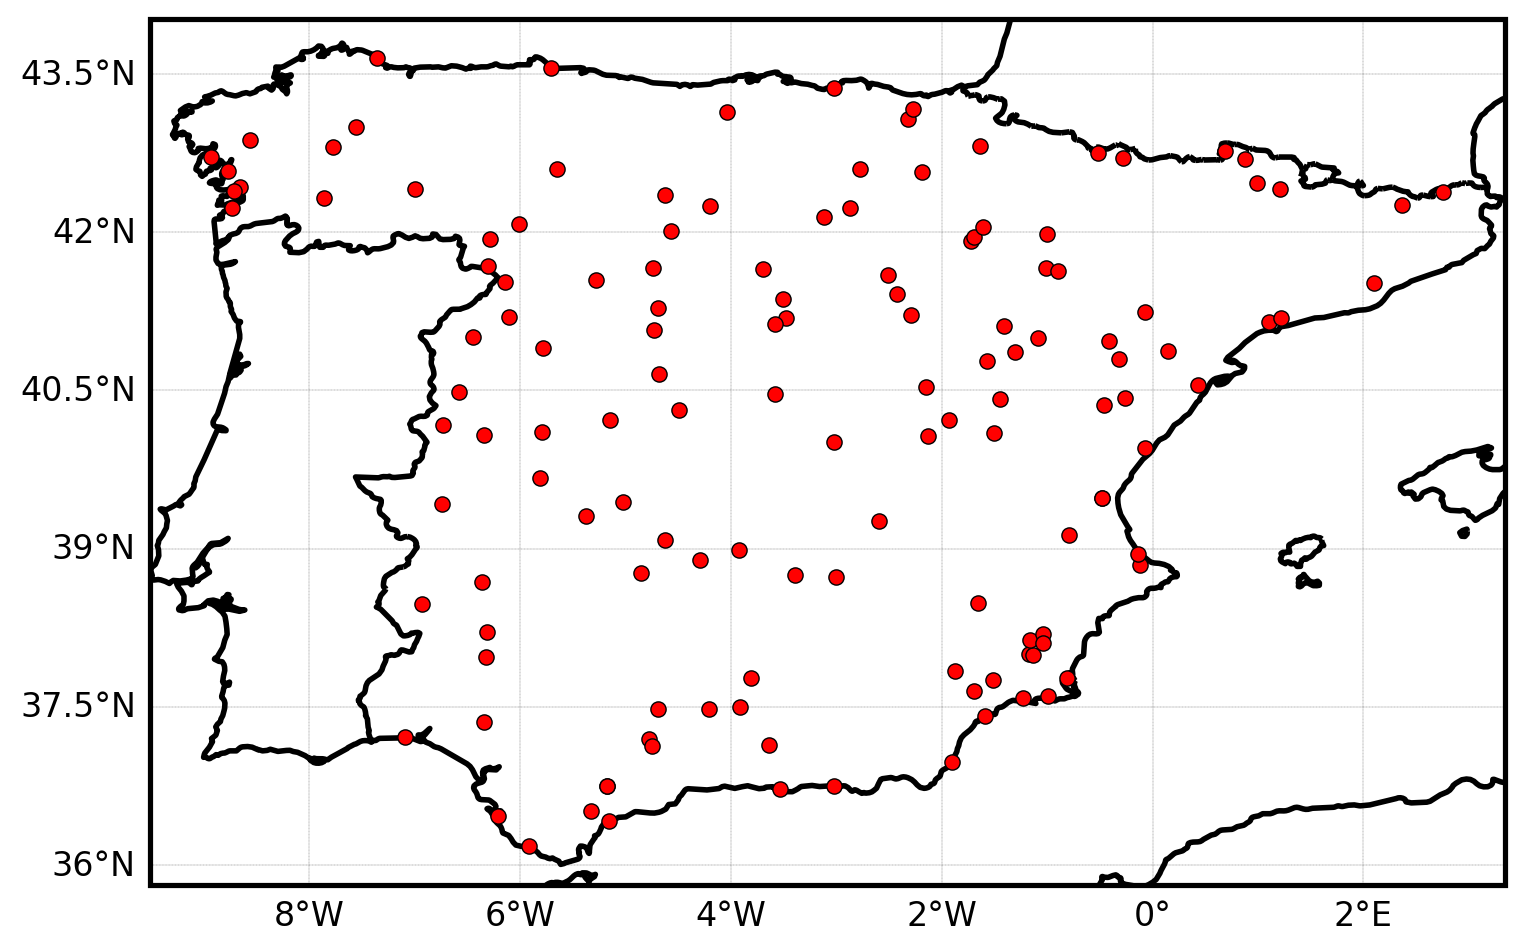

In [12]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})


ds.sel(time="2020-10-10").plot.scatter(
    x="lon", y="lat", #hue="t2m_max", 
    s=30.0,ax=ax, c="red",
    # alpha=0.5,
    marker="o",
    edgecolors="black",
    linewidths=0.5, 
    zorder=3,
)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')

ax.set(title="")
# ax.set(title=variable)
ax.add_feature(cf.COASTLINE, linewidth=2)
ax.add_feature(cf.BORDERS, linewidth=2)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12} 
plt.tight_layout()
plt.show()

### Viz - Altitude

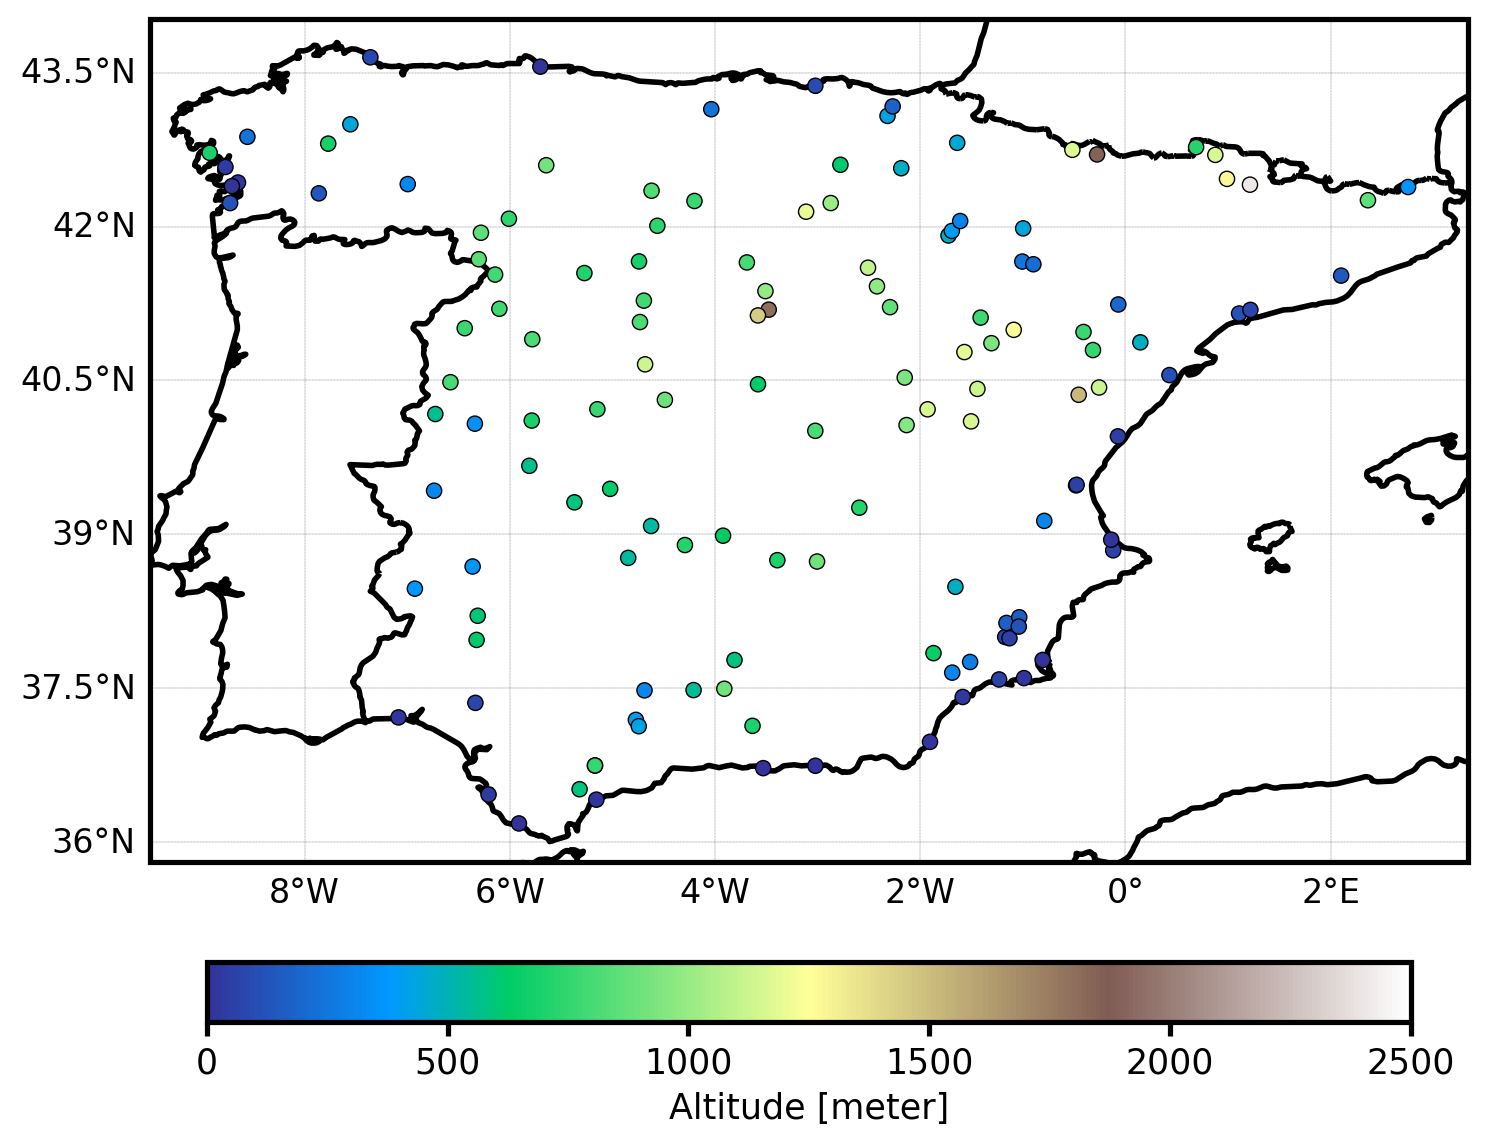

In [11]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})


cbar_kwargs = {
    "fraction": 0.06, 
    "pad": 0.1, 
    "orientation": "horizontal",
}
ds.sel(time="2020-10-10").plot.scatter(
    x="lon", y="lat", hue="alt", 
    s=30.0,ax=ax, cmap="terrain", 
    # alpha=0.5,
    vmin=0.0,
    vmax=2500,
    marker="o",
    edgecolors="black", 
    linewidths=0.5, 
    zorder=3,
    cbar_kwargs=cbar_kwargs
)
ax.set(title="")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
# ax.set(title=variable)
ax.add_feature(cf.COASTLINE, linewidth=2)
ax.add_feature(cf.BORDERS, linewidth=2)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12} 
plt.tight_layout()
plt.show()
plt.show()